In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import glob
import pycountry as pc
import ast
import re
from time import time

In [2]:
data_source = '/home/mateusz/Research/twitter-data/chunk1/chunk1/'
files = sorted(glob.glob(data_source + '/*'))
files[:5]

['/home/mateusz/Research/twitter-data/chunk1/chunk1/COVIDtweets-0000.json',
 '/home/mateusz/Research/twitter-data/chunk1/chunk1/COVIDtweets-0001.json',
 '/home/mateusz/Research/twitter-data/chunk1/chunk1/COVIDtweets-0002.json',
 '/home/mateusz/Research/twitter-data/chunk1/chunk1/COVIDtweets-0003.json',
 '/home/mateusz/Research/twitter-data/chunk1/chunk1/COVIDtweets-0004.json']

In [3]:
files_count = 10
records = []

for f in files[:files_count]:
    with open(f, 'r') as source:
        data = json.load(source)
        records += data['records']
        
records[0]

{'created_at': 'Sat Mar 07 10:59:03 +0000 2020',
 'text': 'RT @serdarkaragoz: Just “eyvallah”\n#coronavirus https://t.co/C2tMUNJV4e',
 'id': 1236244970253824000,
 'coordinates': None,
 'place': None,
 'lang': 'tr',
 'user': {'id': 255122356, 'location': 'terre', 'followers_count': 4528},
 'entities': {'hashtags': [{'text': 'coronavirus', 'indices': [35, 47]}]}}

In [4]:
%%time

def extract_data(tweet):
    
    return {
        'time': tweet['created_at'],
        'id': tweet['id'],
        'coordinates': tweet['coordinates'],
        'place': tweet['place'],
        'lang': tweet['lang'],
        'user_location': tweet['user']['location'],
        'followers_count': tweet['user']['followers_count']
    }
    
extracted = [extract_data(tweet) for tweet in records]
df = pd.DataFrame(extracted)
print(len(df))
df.head()

500000
CPU times: user 1.1 s, sys: 100 ms, total: 1.2 s
Wall time: 1.21 s


,time,id,coordinates,place,lang,user_location,followers_count
0,Sat Mar 07 10:59:03 +0000 2020,1.236245e+18,None,None,tr,terre,4528.0
1,Sat Mar 07 10:59:03 +0000 2020,1.236245e+18,None,None,en,"Chatburn, England.",1127.0
2,Sat Mar 07 10:59:03 +0000 2020,1.236245e+18,None,None,es,"Madrid, España",224.0
3,Sat Mar 07 10:59:04 +0000 2020,1.236245e+18,None,None,th,None,2129.0
4,Sat Mar 07 10:59:03 +0000 2020,1.236245e+18,None,None,en,✈,9709.0


In [5]:
df_with_location = df[df['user_location'].values != None]
print(len(df_with_location))
df_with_location.head(50)

316518


,time,id,coordinates,place,lang,user_location,followers_count
0,Sat Mar 07 10:59:03 +0000 2020,1.236245e+18,None,None,tr,terre,4528.0
1,Sat Mar 07 10:59:03 +0000 2020,1.236245e+18,None,None,en,"Chatburn, England.",1127.0
2,Sat Mar 07 10:59:03 +0000 2020,1.236245e+18,None,None,es,"Madrid, España",224.0
4,Sat Mar 07 10:59:03 +0000 2020,1.236245e+18,None,None,en,✈,9709.0
5,Sat Mar 07 10:59:04 +0000 2020,1.236245e+18,None,None,es,"Edo. Bolivar, Venezuela",21344.0
6,Sat Mar 07 10:59:04 +0000 2020,1.236245e+18,None,None,th,J A N G W O O Y O U N G- H S W,288.0
8,Sat Mar 07 10:59:04 +0000 2020,1.236245e+18,None,None,en,"Namibia, Windhoek",8263.0
9,Sat Mar 07 10:59:03 +0000 2020,1.236245e+18,None,None,en,England,52.0
11,Sat Mar 07 10:59:04 +0000 2020,1.236245e+18,None,None,th,"Jenins, Schweiz",275.0
13,Sat Mar 07 10:59:04 +0000 2020,1.236245e+18,None,None,de,"Potsdam, Deutschland",2.0


## find countries from locations

In [7]:
class CountryLookup:
    def __init__(self, translation_file):
        translation_df = pd.read_csv(translation_file, keep_default_na=False, na_values=[''])
        clean_df = translation_df[translation_df['alpha_2'].isnull().values == False]
        translation_dict = {}
        
        for _, row in clean_df.iterrows():
            alpha_2 = row['alpha_2']
            translation_dict[row['english_name']] = alpha_2
            
            native_names = ast.literal_eval(row['native_names'])
            for native in native_names:
                translation_dict[native] = alpha_2
                
            pc_record = pc.countries.lookup(alpha_2)
            translation_dict[pc_record.name.lower()] = alpha_2
    
            try:
                translation_dict[pc_record.official_name.lower()] = alpha_2
            except AttributeError:
                continue
            
        self.translation_dict = translation_dict
        
    def __getitem__(self, key):
        key = key.lower()
        key_parts = re.split(r'[?.,-]', key)
        key_parts = [k for k in key_parts if len(k) > 0]
        for k in key_parts:
            k = ' '.join(k.split())
            lookup = self.translation_dict.get(k)
            if lookup is not None:
                return lookup
            
        return None
    
country_lookup = CountryLookup('./countries-translation/global_names.csv')

In [15]:
detected_countries = []
records_limit = 500_000

start_time = time()
counter = 0

for _, r in df_with_location.iterrows():
    
    if i > records_limit:
        break
        
    counter += 1
    
    cc = country_lookup[r['user_location']]
    if cc is not None:
        detected_countries.append((r['user_location'], cc))
    
end_time = time()
total_time = end_time - start_time

detected = len(detected_countries)
k_records_per_sec = counter / total_time / 1_000

print(
    f"""
    processed {counter} records
    detected {detected} countries ({round(detected/counter * 100, 2)}%)
    time = {round(total_time, 2)} seconds (~{round(k_records_per_sec, 2)}k records per sec.)
    """
)


    processed 316518 records
    detected 125391 countries (39.62%)
    time = 37.13 seconds (~8.53k records per sec.)
    


In [16]:
detected_codes = [code for name, code in detected_countries]
codes_count = {}

for code in detected_codes:
    if codes_count.get(code) is None:
        codes_count[code] = 1
        
    else:
        codes_count[code] += 1
    
codes_count

{'GB': 11172,
 'ES': 9566,
 'VE': 2865,
 'NA': 78,
 'DE': 2119,
 'AR': 3367,
 'FR': 14663,
 'IT': 4695,
 'NG': 1845,
 'ZA': 3514,
 'PK': 802,
 'AU': 1664,
 'CO': 6263,
 'PL': 321,
 'KP': 343,
 'TR': 722,
 'US': 20333,
 'TH': 3184,
 'IN': 4952,
 'CH': 680,
 'NL': 789,
 'SG': 602,
 'JP': 1401,
 'KE': 460,
 'MV': 278,
 'PT': 1047,
 'PA': 417,
 'MX': 768,
 'CN': 246,
 'CA': 1996,
 'PE': 1613,
 'PH': 1156,
 'UY': 209,
 'MY': 1084,
 'IE': 1416,
 'CL': 1141,
 'HK': 739,
 'GR': 185,
 'BR': 2250,
 'IR': 154,
 'NZ': 169,
 'LS': 9,
 'GH': 337,
 'RW': 64,
 'SA': 1567,
 'FI': 206,
 'HU': 72,
 'MG': 36,
 'BW': 62,
 'LU': 63,
 'BE': 1000,
 'JM': 135,
 'IQ': 89,
 'EG': 219,
 'PY': 830,
 'AE': 365,
 'EC': 1009,
 'CZ': 131,
 'RO': 93,
 'QA': 105,
 'BB': 32,
 'SE': 397,
 'MT': 72,
 'GE': 659,
 'KW': 253,
 'ID': 745,
 'SN': 143,
 'JO': 32,
 'TO': 1,
 'NO': 283,
 'GN': 23,
 'AT': 244,
 'MN': 78,
 'NP': 90,
 'CU': 267,
 'HN': 78,
 'GT': 141,
 'VN': 105,
 'CM': 118,
 'MH': 5,
 'BO': 124,
 'IS': 31,
 'ZW': 10

In [17]:
codes_count['PL']

321

<BarContainer object of 20 artists>

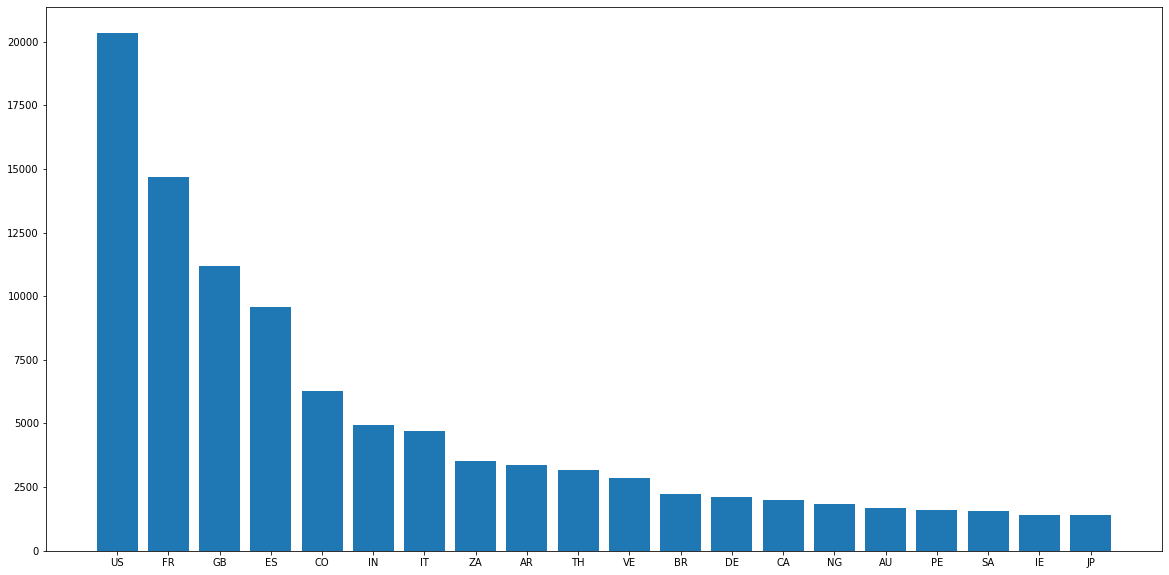

In [18]:
sorted_codes = sorted(list(codes_count.items()), key=lambda x: -x[1])
keys = [code for code, count in sorted_codes]
values = [count for code, count in sorted_codes]

count = 20

plt.figure(figsize=(20, 10))
plt.bar(keys[:count], values[:count])

In [19]:
sorted_codes[::-1]

[('TM', 1),
 ('MR', 1),
 ('KM', 1),
 ('GD', 1),
 ('VU', 1),
 ('WS', 1),
 ('CV', 1),
 ('ME', 1),
 ('FO', 1),
 ('CF', 1),
 ('PW', 1),
 ('LI', 1),
 ('TO', 1),
 ('UZ', 2),
 ('FM', 2),
 ('ER', 2),
 ('DJ', 2),
 ('GF', 2),
 ('SS', 3),
 ('LR', 3),
 ('SL', 3),
 ('DM', 3),
 ('SC', 3),
 ('LA', 3),
 ('SR', 4),
 ('BN', 4),
 ('GY', 4),
 ('KG', 5),
 ('BI', 5),
 ('VA', 5),
 ('BZ', 5),
 ('MD', 5),
 ('BT', 5),
 ('MH', 5),
 ('MK', 6),
 ('TD', 6),
 ('BA', 6),
 ('SM', 6),
 ('LC', 7),
 ('KI', 8),
 ('AG', 8),
 ('SY', 8),
 ('MO', 8),
 ('LS', 9),
 ('GL', 10),
 ('BY', 10),
 ('GA', 12),
 ('GM', 12),
 ('AZ', 12),
 ('FJ', 13),
 ('PG', 13),
 ('SO', 13),
 ('TN', 13),
 ('MZ', 14),
 ('LY', 14),
 ('LT', 15),
 ('KZ', 15),
 ('BF', 15),
 ('ML', 16),
 ('MM', 17),
 ('TG', 17),
 ('GG', 18),
 ('AL', 20),
 ('MU', 20),
 ('SZ', 20),
 ('IM', 21),
 ('AD', 22),
 ('GN', 23),
 ('SD', 24),
 ('BS', 24),
 ('SK', 25),
 ('AF', 26),
 ('LV', 26),
 ('YE', 26),
 ('CG', 27),
 ('AO', 27),
 ('MC', 31),
 ('BG', 31),
 ('IS', 31),
 ('JO', 32),
 ('B